In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [2]:
order = [
    ["Flower", "ConeExpand"],
    ["OhMiniMap", "2DMiniMap+"],
    ["ThreeDMiniMap", "3DMiniMap"],
    ["GravityZone", "GravityZone+"],
]

In [3]:
# load from csv
dfs = pd.read_csv("clean.csv")

In [16]:
dfs["total_clicks"] = dfs["left_trigger_clicked"] + dfs["right_trigger_clicked"] + dfs["left_grip_clicked"] + dfs["right_grip_clicked"]
dfs["total_hand_movement"] = dfs["left_hand_distance_travelled"] + dfs["right_hand_distance_travelled"]

In [17]:
dfs

,index,subject_id,technique,density,global_trial_idx,trial_type,trial_id,distance_to_obj,num_attempts,trial_time,left_hand_distance_travelled,right_hand_distance_travelled,left_trigger_clicked,right_trigger_clicked,left_grip_clicked,right_grip_clicked,total_clicks,total_hand_movement
0,0,sub_2,ConeExpand,high,1,Search,1,5.180508,1,29.417430,2.352017,0.544742,0,11,0,14,25,2.896759
1,2,sub_2,ConeExpand,high,3,Search,2,7.540501,1,7.589279,0.654662,0.474572,0,3,0,1,4,1.129234
2,4,sub_2,ConeExpand,high,5,Search,3,9.917036,1,3.897247,0.615910,0.047036,0,2,0,1,3,0.662947
3,6,sub_2,ConeExpand,high,7,Search,4,9.982533,1,14.245030,0.978778,0.064257,0,9,0,8,17,1.043035
4,8,sub_2,ConeExpand,high,9,Search,5,4.123013,1,5.554153,0.739541,0.051321,0,4,0,2,6,0.790862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,1,sub_25,3DMiniMap,medium,2,Repeat,1,12.413160,1,3.932720,0.716282,0.583880,2,0,0,1,3,1.300162
2841,3,sub_25,3DMiniMap,medium,4,Repeat,2,13.320130,1,3.027931,0.837713,0.816345,1,0,0,2,3,1.654058
2842,5,sub_25,3DMiniMap,medium,6,Repeat,3,11.610930,1,1.512787,0.320236,0.236572,1,0,0,1,2,0.556808
2843,7,sub_25,3DMiniMap,medium,8,Repeat,4,8.381015,1,2.608852,0.462881,0.326992,2,0,0,1,3,0.789873


<AxesSubplot:xlabel='technique', ylabel='total_clicks'>

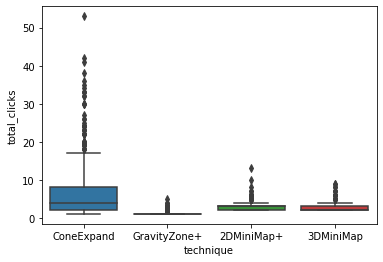

In [31]:
sns.boxplot(x="technique", y="total_clicks", data=dfs)

In [32]:
dfs.groupby(["technique", "trial_type"]).mean()["total_clicks"]

technique     trial_type
2DMiniMap+    Repeat        2.888579
              Search        2.839888
3DMiniMap     Repeat        2.332394
              Search        2.559322
ConeExpand    Repeat        4.698592
              Search        8.202817
GravityZone+  Repeat        1.109551
              Search        1.121127
Name: total_clicks, dtype: float64

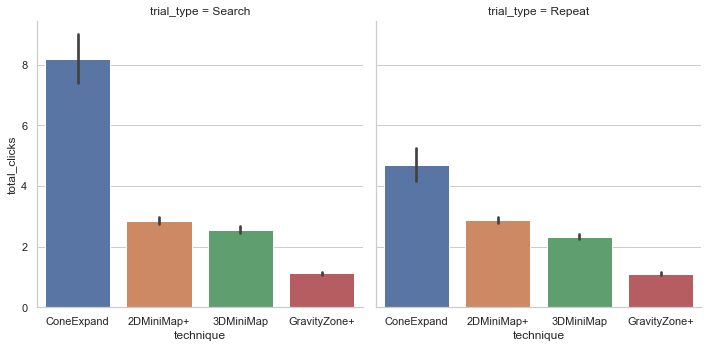

In [30]:
sns.catplot(x="technique", y="total_clicks", col="trial_type", data=dfs, kind="bar", order=[o[1] for o in order])

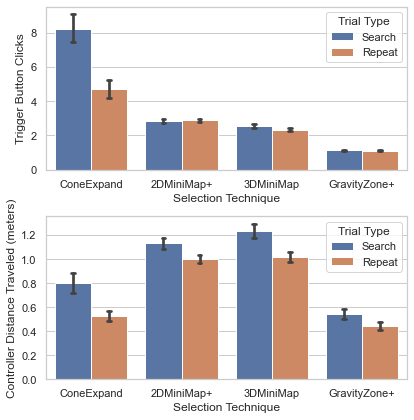

In [40]:
fig, ax = plt.subplots(2, 1, figsize=(6, 6))

sns.barplot(
    x="technique",
    y="total_clicks",
    data=dfs,
    order=[o[1] for o in order],
    ax=ax[0],
    hue="trial_type",
    ci=95,
    capsize=0.04,
)

sns.barplot(
    x="technique",
    y="total_hand_movement",
    data=dfs,
    order=[o[1] for o in order],
    ax=ax[1],
    hue="trial_type",
    ci=95,
    capsize=0.04,
)

ax[0].set_ylabel("Trigger Button Clicks")
ax[1].set_ylabel("Controller Distance Traveled (meters)")

ax[0].set_xlabel("Selection Technique")
ax[1].set_xlabel("Selection Technique")

# set legend name for ax[0]
# handles, labels = ax[0].get_legend_handles_labels()
# ax[0].legend(handles=handles[1:], labels=labels[1:])
ax[0].legend(title="Trial Type")
ax[1].legend(title="Trial Type")

fig.tight_layout()

fig.savefig("total_clicks_distance.pdf")


In [15]:
dfs.groupby(["technique"]).mean()["total_clicks"]

technique
2DMiniMap+      2.864336
3DMiniMap       2.445698
ConeExpand      6.450704
GravityZone+    1.115331
Name: total_clicks, dtype: float64

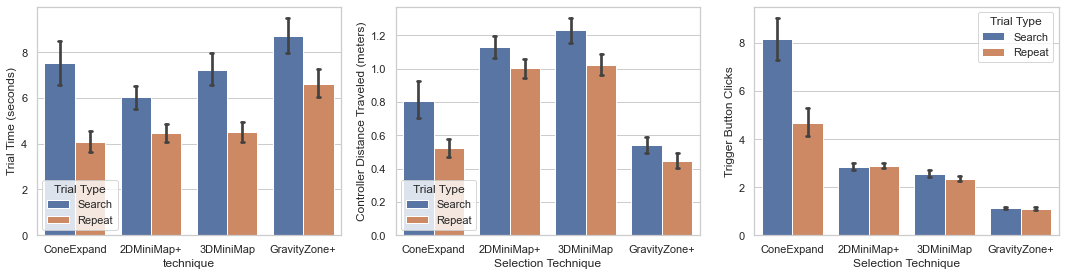

In [60]:
condensed_dfs = dfs.groupby(["subject_id", "technique", "density", "trial_type"]).mean()[["total_clicks", "total_hand_movement", "trial_time"]].reset_index()

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

sns.barplot(
    x="technique",
    y="total_clicks",
    data=condensed_dfs,
    order=[o[1] for o in order],
    hue_order=["Search", "Repeat"],
    ax=ax[2],
    hue="trial_type",
    ci=95,
    capsize=0.04,
)

sns.barplot(
    x="technique",
    y="total_hand_movement",
    data=condensed_dfs,
    order=[o[1] for o in order],
    hue_order=["Search", "Repeat"],
    ax=ax[1],
    hue="trial_type",
    ci=95,
    capsize=0.04,
)

sns.barplot(
    x="technique",
    y="trial_time",
    data=condensed_dfs,
    order=[o[1] for o in order],
    hue_order=["Search", "Repeat"],
    ax=ax[0],
    hue="trial_type",
    ci=95,
    capsize=0.04,
)

ax[2].set_ylabel("Trigger Button Clicks")
ax[1].set_ylabel("Controller Distance Traveled (meters)")
ax[0].set_ylabel("Trial Time (seconds)")

ax[2].set_xlabel("Selection Technique")
ax[1].set_xlabel("Selection Technique")

# set legend name for ax[0]
# handles, labels = ax[0].get_legend_handles_labels()
# ax[0].legend(handles=handles[1:], labels=labels[1:])
ax[0].legend(title="Trial Type", loc="lower left")
ax[1].legend(title="Trial Type", loc="lower left")
ax[2].legend(title="Trial Type", loc="upper right")

fig.tight_layout()

fig.savefig("total_clicks_distance_time.pdf")
